## Project : Medical Insurance Cost predict Model

### Project Objective **accurately predict insurance costs**


#### Data Understing

**Data Source** [kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance)

##### Features used :

* **age**: age of primary beneficiary
* **sex**: insurance contractor gender, female, male
* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Smoking
* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical costs billed by health insurance

### Goal of project:
* Accuracy of model
* Effective/meangingful analysis
* Hypothesis
* Feature Engineering
* Model training
* Model Evaluation 
* Fine turning of the model


In cell below I import libraries to apply in entire project process

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The cell below loads data for manipulation using `pandas as pd` and stored under variable `medic_df`

In [2]:
medic_df = pd.read_csv('data/insurance.csv')
medic_df.head() # returns first 5 record of data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


`.shape` Returns a dataframe

Cell below performs metadata summary using `.info()` method

In [3]:
# perform metadata summary
medic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
"""
The above cell shows that medic_df as total of 1338 entries and 7 attributes
It contains 4 attributes of data type int and float and 3 of dtypes object
There are No missing values
"""

'\nThe above cell shows that medic_df as total of 1338 entries and 7 attributes\nIt contains 4 attributes of data type int and float and 3 of dtypes object\nThere are No missing values\n'

In [5]:
# perform statistical summary

medic_df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Returns a dataframe containing only numeric values

For effective data prepation & cleaning I will group dataset into  `numeric_values` and `categorical_values`

In cell below I group `numeric_values` and perform cleaning on numeric first



In [6]:
# selects only numeric attributes from medic_df

numeric_values = medic_df.select_dtypes(include=[np.number]).columns
numeric_values


Index(['age', 'bmi', 'children', 'charges'], dtype='object')

Returns a list of numeric attributes only

In [7]:
# checks for missing values in percent
(medic_df[numeric_values].isna().sum() / len(medic_df[numeric_values]))*100

age         0.0
bmi         0.0
children    0.0
charges     0.0
dtype: float64

No missing values in numeric_values

In [8]:
# check for duplicates

medic_df[numeric_values].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

No duplicates found on numeric_values


In cell below perform the same process for `categorical_values`

In [9]:
# selects cat_values in medic_df

categorical_values = medic_df.select_dtypes(include=['object']).columns
categorical_values

Index(['sex', 'smoker', 'region'], dtype='object')

Returns a list of categorical columns from medic_df

In [10]:
# checks for duplicates 

medic_df[categorical_values].duplicated()

0       False
1       False
2        True
3       False
4        True
        ...  
1333     True
1334     True
1335     True
1336     True
1337     True
Length: 1338, dtype: bool

In [11]:
# check for missing values

(medic_df[categorical_values].isna().sum() / len(medic_df[categorical_values]))*100

sex       0.0
smoker    0.0
region    0.0
dtype: float64

There is no missing values in categorical_values

In [12]:
# check for shape medic_df

medic_df.shape

(1338, 7)

Returns a tuple showing entries and attributes

## Data Analysis 

The following are some key **analysis objectives** to accurately predict insurance costs

1. **Identify key factors affecting insurance** : eg which variables influences medical charges(age, BMI, smoking)
2. **Asses the impact of smoking on medical expenses** : compare the cost of smokers and non-smokers
3. **Evaluate regional cost differences**: Investigate if medical charges vary significantly across different Us regions
4. **Analyze the effect of BMI on medical costs** : check whether individuals with higher BMI have higher insurance costs.
5. **Determine how family size(number of children) affects insurance costs** : Investigate whether dependents significantly increase expenses.

#### Key Questions for Analysis:

* How does age affect medical insurance costs?
* Are medical costs higher for smokers compared to non-smokers?
* Does BMI have a linear relationship with medical expenses?
* Is there a significant difference in insurance costs across different regions?
* How do medical costs change with the number of children (dependents)?
* Which combination of features provides the best prediction model for insurance charges?
* Does gender play a role in determining medical insurance costs?
* Can we accurately predict a person’s medical expenses given their personal attributes?


In cell below I finds relationshiop to **key attributes of medical charges** which are `(age, BMI, smoking)`

**Relationship on key factors affecting Insurance**

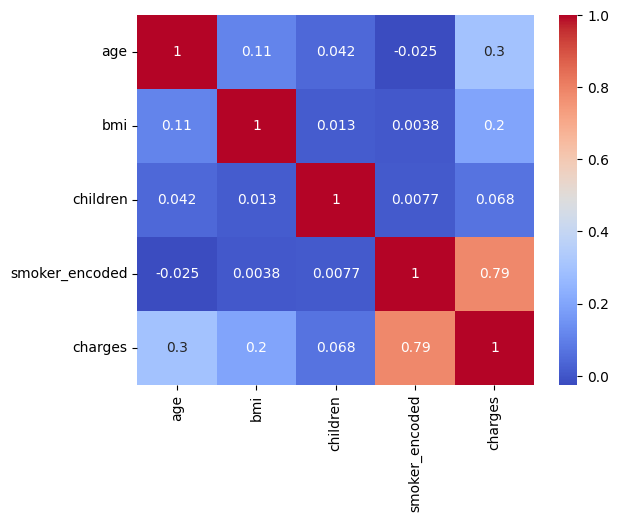

In [13]:
# correlation of the key attributes to medical charges

# encode smoker 

medic_df['smoker_encoded'] = medic_df['smoker'].map({'yes':1, 'no':0})

correlation = medic_df[['age', 'bmi', 'children', 'smoker_encoded', 'charges']].corr()


sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

**Observation** : 

✅ Strong Positive Correlation (0.79) between 'smoker_encoded' and 'charges'

* Smokers tend to pay significantly higher medical insurance charges compared to non-smokers.
* This suggests that smoking is a major risk factor affecting insurance costs.

✅ Moderate Correlation (0.3) between 'age' and 'charges'

* Older individuals tend to have higher medical costs.
* This aligns with the expectation that health issues increase with age.

✅ Weak Correlations with 'bmi' and 'children'

* BMI has a small impact (0.2), which might mean that obesity slightly influences medical costs.
* The number of children has almost no effect (0.068), suggesting it doesn’t significantly change medical expenses.

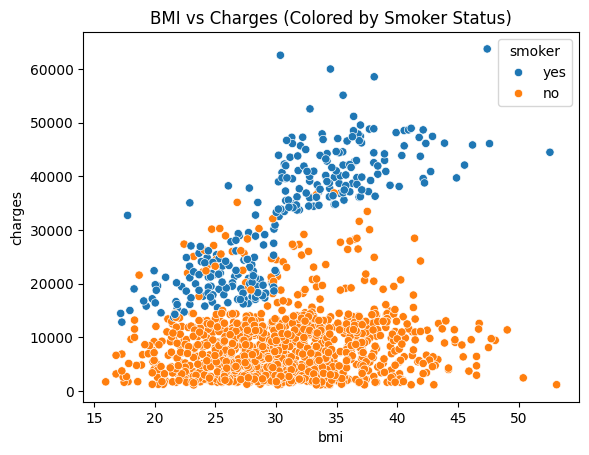

In [14]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=medic_df)
plt.title('BMI vs Charges (Colored by Smoker Status)')
plt.show()

**Observation** :

✅ Smokers (blue) pay significantly higher medical charges compared to non-smokers (orange), confirming the strong correlation seen in the heatmap.

✅ Non-smokers mostly pay lower charges, regardless of their BMI. Their charges rarely exceed $20,000.

✅ BMI alone does not strongly affect medical charges, as seen from the overlapping points in both smoker and non-smoker categories. However, for smokers, higher BMI slightly increases medical costs, as indicated by the trend of rising charges with BMI.

2. **Impact of smoking on medical Insurance**(compare cost of smokers and non smokers)

**chart** : `barplot`


C:\Users\ronny somi\AppData\Local\Temp\ipykernel_14724\358718501.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=medic_df, x='smoker', y='charges', palette='coolwarm', ci=None, ax=ax)
C:\Users\ronny somi\AppData\Local\Temp\ipykernel_14724\358718501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medic_df, x='smoker', y='charges', palette='coolwarm', ci=None, ax=ax)


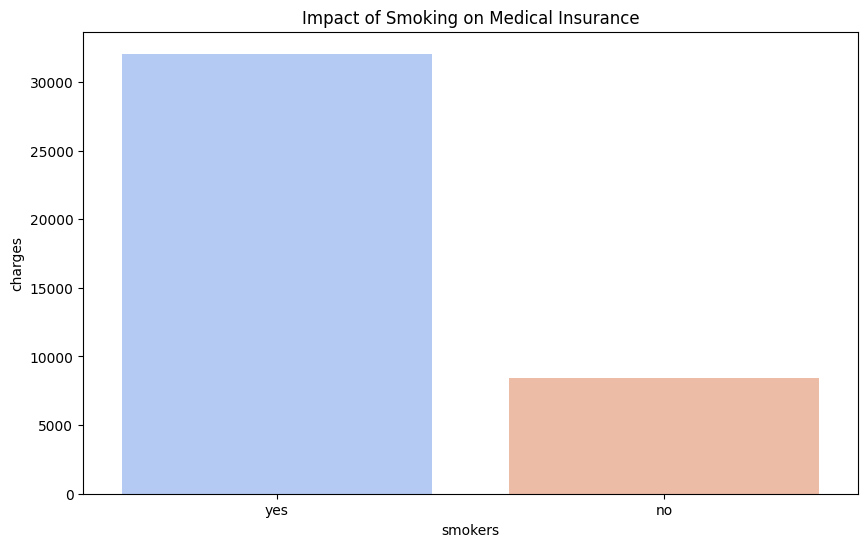

In [25]:
# plot

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=medic_df, x='smoker', y='charges', palette='coolwarm', ci=None, ax=ax)
ax.set_xlabel('smokers')
ax.set_ylabel('charges')
ax.set_title('Impact of Smoking on Medical Insurance')
plt.show()

**Observation**:

✅ Smokers pay significantly higher medical insurance charges compared to non-smokers.

✅ Non-smokers have lower and more consistent charges, while smokers show a slight variation (as seen from the error bars).

✅ This supports the hypothesis that smoking is a strong factor in increasing medical costs.

3. **Does Medical charges vary depending on regions**

**chart** : `barplot`

C:\Users\ronny somi\AppData\Local\Temp\ipykernel_14724\1503209598.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=medic_df, x='region', y='charges', palette='Set2', ax=ax)


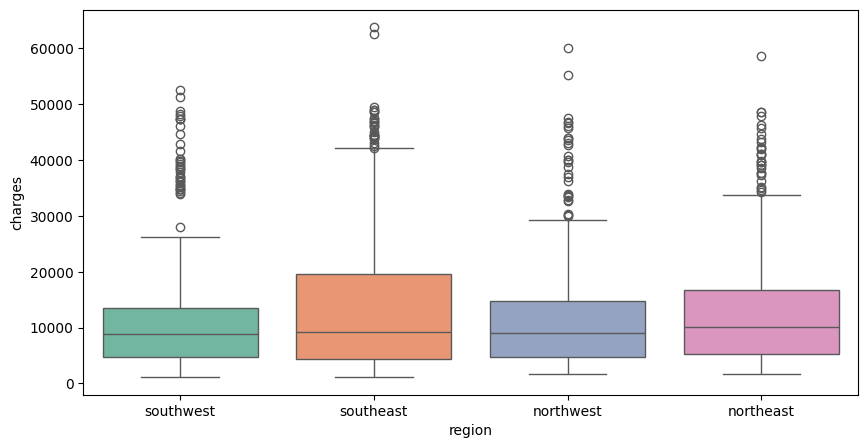

In [28]:
# plot

fig, ax =plt.subplots(figsize=(10,5))
sns.boxplot(data=medic_df, x='region', y='charges', palette='Set2', ax=ax)
plt.show()

**Observation**:

✅ Southeast and Northeast regions have slightly higher medical charges compared to Southwest and Northwest.

✅ Outliers are present in all regions, but Southeast seems to have the highest concentration of extreme values.

✅ The median charges appear similar across all regions, but the Southeast region shows a wider distribution.

✅ The interquartile range (IQR) is relatively similar, indicating that most of the data points are distributed within the same range.

In [31]:
# medical charges by region and sex

aggregation = medic_df.groupby(['region', 'sex'])['charges'].mean().reset_index()
aggregation

,region,sex,charges
0,northeast,female,12953.203151
1,northeast,male,13854.005374
2,northwest,female,12479.870397
3,northwest,male,12354.119575
4,southeast,female,13499.669243
5,southeast,male,15879.617173
6,southwest,female,11274.411264
7,southwest,male,13412.883576


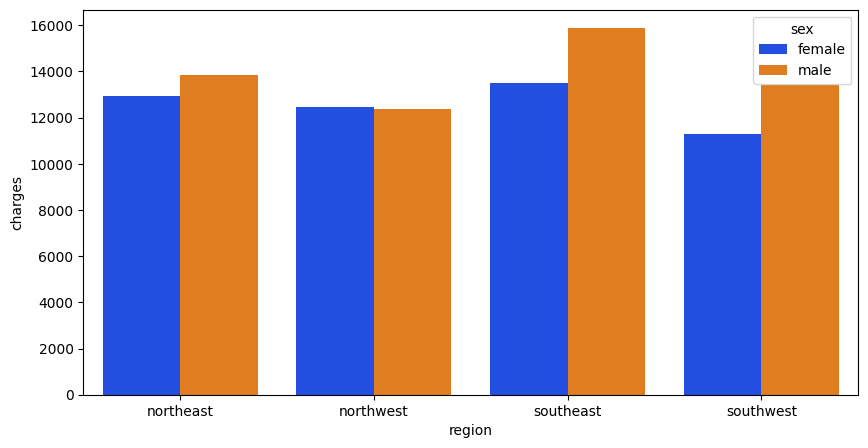

In [34]:
# plot 

fig, ax =plt.subplots(figsize=(10,5))
sns.barplot(data=aggregation, x='region', y='charges', hue='sex', palette='bright', ax=ax)
plt.show()

**Observation** :

✅ Northeast: Males tend to have slightly higher medical charges than females.

✅ Northwest: Both males and females have similar medical charges.

✅ Southeast: Males have significantly higher medical charges compared to females.

✅ Southwest: (Seems like your analysis got cut off) – From the chart, males are charged more than

**Determine whether family size affect medical charges (charges)**

barplot & boxplot

C:\Users\ronny somi\AppData\Local\Temp\ipykernel_14724\3309322154.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=medic_df, x='children', y='charges', palette='Set2', ci=None, ax=ax)
C:\Users\ronny somi\AppData\Local\Temp\ipykernel_14724\3309322154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medic_df, x='children', y='charges', palette='Set2', ci=None, ax=ax)


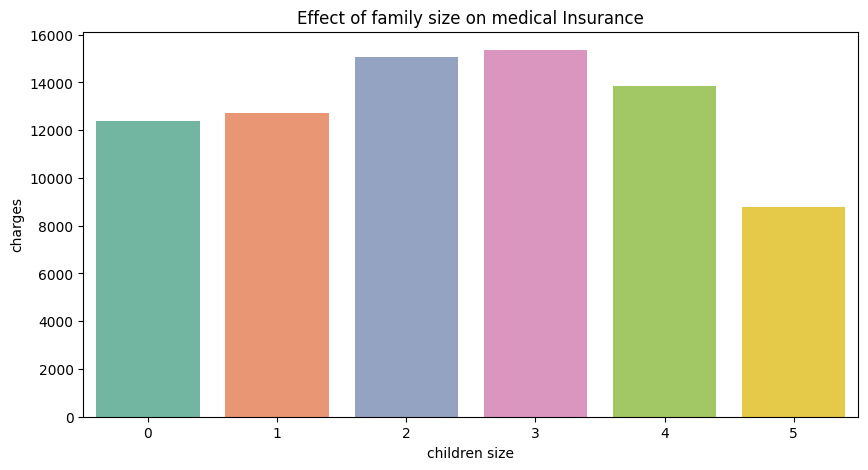

In [37]:
# plot

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=medic_df, x='children', y='charges', palette='Set2', ci=None, ax=ax)

ax.set_xlabel('children size')
ax.set_ylabel('charges')
ax.set_title('Effect of family size on medical Insurance')

plt.show()

**Obesevation**:

✅ Family size does not have a consistent impact on medical charges.

✅ Families with 2 and 3 children have the highest medical charges.

✅ Families with 5 children pay less than those with 2, 3, or even 0 children – contradicting the expectation that larger families have higher costs.

✅ A family size of 0 (no children) still incurs significant medical charges, suggesting that medical costs are not solely dependent on the number of children but likely on other factors such as age, health conditions, or smoking status.

In cell below group **children, Age, region and charges** to compare difference between children size and Age with charges etc

`.groupby`

In [54]:
# groupby

grouped = medic_df.groupby('region').agg({
    'age':'mean',       # Average age per region
    'children': 'mean',  # Average number of children per region
    'charges': 'mean'    # Average charges per region
}).reset_index()

grouped = grouped.sort_values(by='charges',ascending=False)
    


grouped

,region,age,children,charges
2,southeast,38.939560,1.049451,14735.411438
0,northeast,39.268519,1.046296,13406.384516
1,northwest,39.196923,1.147692,12417.575374
3,southwest,39.455385,1.141538,12346.937377


C:\Users\ronny somi\AppData\Local\Temp\ipykernel_14724\2531360612.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x='region', y='charges', palette='coolwarm', ax=ax)


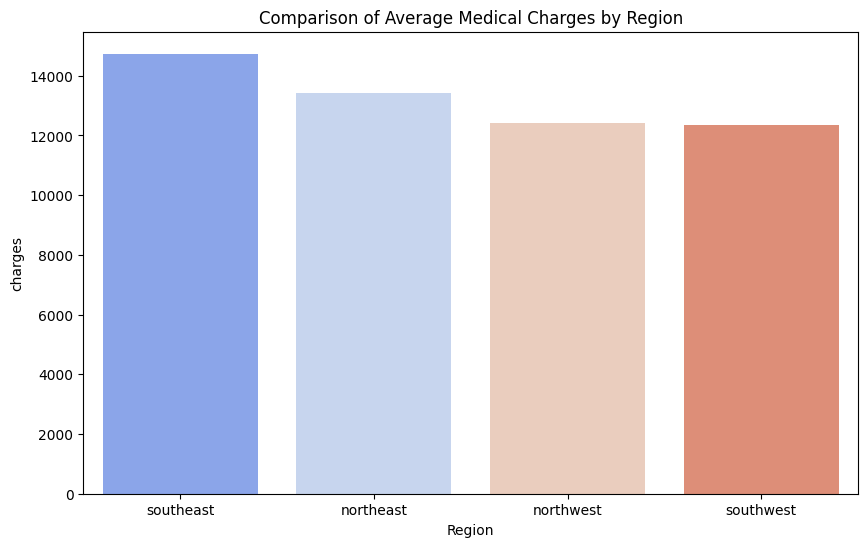

In [56]:
fig, ax =plt.subplots(figsize=(10,6))
sns.barplot(data=grouped, x='region', y='charges', palette='coolwarm', ax=ax)

ax.set_xlabel('Region')
ax.set_ylabel('charges')
ax.set_title('Comparison of Average Medical Charges by Region')
plt.show()